---
# <span style='color:#2a54b2;font-family:Verdana'><center><b>4. CDC - A Través de un Prisma...
---

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Pues llegamos al final del recorrido, con sorpresa (y preocupación) por lo que hemos encontrado hasta ahora.<br>
Aquí intentaremos entrar más a fondo en los extraños hallazgos que nos ha deparado el dataset anterior. El que analizaremos en este notebook es similar, pero además discrimina por grupos de edad (e incluye nada menos que 10 rangos), por lo que creo que nos permitirá hacer un análisis muy valioso. Lo que haremos es poner el foco en las causas de fallecimiento que más nos han llamado la atención, para intentar llegar a conclusiones más claras.<br><br>
Desgraciadamente, el último mes que incluye este dataset es setiembre de 2021, y no sé si va a volver a actualizarse, pero es lo que tenemos (y creo que es más que suficiente para lo que queremos investigar, aunque está claro que no es lo ideal). Por otra parte, este dataset refleja los fallecimientos por mes, en lugar de por semanas, como el dataset anterior.<br>
Animo!, que ya casi hemos acabado. Creo que quien haya leído hasta aquí, no debería abandonar ahora...

---
En este notebook voy a utilizar el dataset **AH Monthly Provisional Counts of Deaths for Select Causes of Death by Sex, Age, and Race and Hispanic Origin**, que puede descargarse desde el siguiente enlace:  
https://data.cdc.gov/NCHS/AH-Monthly-Provisional-Counts-of-Deaths-for-Select/65mz-jvh5

<img src="input/logos/cdc_logo.jpeg" width=350 height=350 />

Detalle de las columnas que voy a utilizar (con los nombres que tendrán una vez renombradas, ya que los nombres originales son muy largos):
- **Year** - Año del fallecimiento.
- **Month** - Mes del fallecimiento.
- **AgeGroup** - Código correspodiente al rango de edad (los valores posibles son: "0-4 years", "5-14 years", "15-24 years", "25-34 years", "35-44 years", "45-54 years", "55-64 years", "65-74 years", "75-84 years" y "85 years and over").
- **All_Cause** - Número de defunciones por todas las causas.
- **Natural_Cause** - Número de defunciones por causas naturales.
- **Septicemia** - Número de defunciones por Septicemia.
- **Malignant_Neoplasms** - Número de defunciones por Cancer.
- **Diabetes_Mellitus** - Número de defunciones por Diabetes Mellitus.
- **Alzheimer** - Número de defunciones por Alzheimer.
- **Influenza_Pneumonia** - Número de defunciones por Gripe y Neumonía.
- **Lower_Resp_Diseases** - Número de defunciones por Enfermedades Respiratorias crónicas.
- **Other_Resp_Diseases** - Número de defunciones por otras Enfermedades Respiratorias.
- **Nephritis_Nephrosis** - Número de defunciones por Nefritis, Síndrome Nefrótico y Nefrosis.
- **Abnormal_Symptoms** - Número de defunciones por Síntomas, Signos y Hallazgos Clínicos Anormales, no clasificados.
- **Heart_Diseases** - Número de defunciones por Ataques al Corazón.
- **Cerebrovascular_Diseases** - Número de defunciones por Enfermedades Cerebrovasculares.
- **COVID-19_Multiple** - Número de defunciones por COVID-19, como causa múltiple.
- **COVID-19_Underlying** - Número de defunciones por COVID-19, como causa subyacente.
---

In [1]:
# Importo las librerías que voy a utilizar:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sbrn
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
# Deshabilito el "chained_assignment", para que no devuelva warnings en algunas modificaciones de columnas:
pandas.set_option('chained_assignment', None)

Importo el archivo CSV:

In [3]:
cdc_df = pandas.read_csv('./input/CDC/AH_Monthly_Provisional_Counts_of_Deaths_for_Select_Causes_of_Death_by_Sex__Age__and_Race_and_Hispanic_Origin.csv')

cdc_df

,AnalysisDate,Date Of Death Year,Date Of Death Month,Start Date,End Date,Jurisdiction of Occurrence,Sex,Race/Ethnicity,AgeGroup,AllCause,...,Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,0-4 years,182,...,0,4,0,1,0,22,1,0,0,0
1,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,5-14 years,44,...,0,4,1,0,0,0,0,0,0,0
2,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,15-24 years,122,...,0,0,2,1,2,4,6,1,0,0
3,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,25-34 years,198,...,0,5,2,3,0,2,8,2,0,0
4,10/13/2021,2019,1,01/01/2019,01/31/2019,United States,F,Hispanic,35-44 years,334,...,0,11,6,4,4,5,25,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,45-54 years,179,...,1,1,0,0,2,34,18,2,70,68
3956,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,55-64 years,237,...,0,3,8,3,2,36,40,8,55,55
3957,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,65-74 years,263,...,3,4,8,3,4,25,60,7,55,49
3958,10/13/2021,2021,9,09/01/2021,09/30/2021,United States,Male,Other,75-84 years,203,...,5,2,6,4,4,17,37,8,36,34


Elimino las columnas que no voy a utilizar, y renombro casi todas las restantes, porque muchos nombres son muy largos, y contienen espacios:

In [4]:
# Elimino las columnas que no voy a utilizar:
cdc_df.drop(['AnalysisDate','Start Date','End Date','Jurisdiction of Occurrence','Sex','Race/Ethnicity'], axis='columns', inplace=True)

# Renombro casi todas las columnas restantes:
cdc_df.rename(columns={'Date Of Death Year':'Year', 'Date Of Death Month':'Month', 'Septicemia (A40-A41)':'Septicemia', 'Malignant neoplasms (C00-C97)':'Malignant_Neoplasms',
                       'Diabetes mellitus (E10-E14)':'Diabetes_Mellitus', 'Alzheimer disease (G30)':'Alzheimer', 'Influenza and pneumonia (J09-J18)':'Influenza_Pneumonia',
                        'Chronic lower respiratory diseases (J40-J47)':'Lower_Resp_Diseases', 'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)':'Other_Resp_Diseases',
                        'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)':'Nephritis_Nephrosis',
                        'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Abnormal_Symptoms',
                        'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Heart_Diseases', 'Cerebrovascular diseases (I60-I69)':'Cerebrovascular_Diseases',
                        'COVID-19 (U071, Multiple Cause of Death)':'COVID-19_Multiple', 'COVID-19 (U071, Underlying Cause of Death)':'COVID-19_Underlying'}, inplace=True)
cdc_df

,Year,Month,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_Neoplasms,Diabetes_Mellitus,Alzheimer,Influenza_Pneumonia,Lower_Resp_Diseases,Other_Resp_Diseases,Nephritis_Nephrosis,Abnormal_Symptoms,Heart_Diseases,Cerebrovascular_Diseases,COVID-19_Multiple,COVID-19_Underlying
0,2019,1,0-4 years,182,162,4,2,0,0,4,0,1,0,22,1,0,0,0
1,2019,1,5-14 years,44,28,1,8,1,0,4,1,0,0,0,0,0,0,0
2,2019,1,15-24 years,122,45,0,7,1,0,0,2,1,2,4,6,1,0,0
3,2019,1,25-34 years,198,100,1,29,6,0,5,2,3,0,2,8,2,0,0
4,2019,1,35-44 years,334,260,7,96,9,0,11,6,4,4,5,25,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,2021,9,45-54 years,179,168,1,15,2,1,1,0,0,2,34,18,2,70,68
3956,2021,9,55-64 years,237,225,2,34,7,0,3,8,3,2,36,40,8,55,55
3957,2021,9,65-74 years,263,258,2,51,11,3,4,8,3,4,25,60,7,55,49
3958,2021,9,75-84 years,203,200,1,35,9,5,2,6,4,4,17,37,8,36,34


Compruebo los **tipos de datos**:

In [5]:
cdc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year                      3960 non-null   int64 
 1   Month                     3960 non-null   int64 
 2   AgeGroup                  3960 non-null   object
 3   AllCause                  3960 non-null   int64 
 4   NaturalCause              3960 non-null   int64 
 5   Septicemia                3960 non-null   int64 
 6   Malignant_Neoplasms       3960 non-null   int64 
 7   Diabetes_Mellitus         3960 non-null   int64 
 8   Alzheimer                 3960 non-null   int64 
 9   Influenza_Pneumonia       3960 non-null   int64 
 10  Lower_Resp_Diseases       3960 non-null   int64 
 11  Other_Resp_Diseases       3960 non-null   int64 
 12  Nephritis_Nephrosis       3960 non-null   int64 
 13  Abnormal_Symptoms         3960 non-null   int64 
 14  Heart_Diseases          

Hago una agrupación en base a las columnas **Year** y **AgeGroup** (con la función **sum**, y excluyendo el año 2019), para comprobar la cantidad de muertes por año, por cada rango de edad y causa de fallecimiento:

In [6]:
cdc_df.query("Year != 2019").groupby(['Year','AgeGroup']).sum()

Month  AllCause  NaturalCause  Septicemia  \
Year AgeGroup                                                       
2020 0-4 years            936     23184         20051         159   
     15-24 years          936     36015          7588         106   
     25-34 years          936     73883         25154         387   
     35-44 years          936    104985         60182         980   
     45-54 years          936    191983        152266        2517   
     5-14 years           936      5644          2902          35   
     55-64 years          936    442008        401712        6264   
     65-74 years          936    675924        649848        9675   
     75-84 years          936    823031        799541       10458   
     85 years and over    936   1013328        985263        9542   
2021 0-4 years            540     16125         14243          98   
     15-24 years          540     27261          7986          68   
     25-34 years          540     58170         26108         282   
     35-44 years          540     86962         57072         755   
     45-54 years          540    151497        125713        1671   
     5-14 years           540      4169          2215          23   
     55-64 years          540    337206        310194        4526   
     65-74 years          540    512735        493405        7238   
     75-84 years          540    590178        572921        7609   
     85 years and over    540    675245        655472        6389   

                        Malignant_Neoplasms  Diabetes_Mellitus  Alzheimer  \
Year AgeGroup                                                               
2020 0-4 years                          363                  5          0   
     15-24 years                       1324                312          0   
     25-34 years                       3588               1170          1   
     35-44 years                      10756               2909          7   
     45-54 years                      34655               7562        100   
     5-14 years                         801                 56          0   
     55-64 years                     110415              18023       1393   
     65-74 years                     175710              27249       9306   
     75-84 years                     163014              25468      37737   
     85 years and over               102466              19541      85737   
2021 0-4 years                          235                  2          0   
     15-24 years                        964                206          0   
     25-34 years                       2572                816          1   
     35-44 years                       8038               1969          9   
     45-54 years                      24244               5113         79   
     5-14 years                         570                 33          0   
     55-64 years                      78161              12946        938   
     65-74 years                     128978              19702       6292   
     75-84 years                     118683              18249      24793   
     85 years and over                74213              13267      53641   

                        Influenza_Pneumonia  Lower_Resp_Diseases  \
Year AgeGroup                                                      
2020 0-4 years                          210                   27   
     15-24 years                        185                  220   
     25-34 years                        582                  400   
     35-44 years                       1155                  794   
     45-54 years                       2522                 3547   
     5-14 years                         105                  147   
     55-64 years                       6319                18854   
     65-74 years                      10492                38598   
     75-84 years                      13860                49389   
     85 years and over                18233                408

Creo un nuevo dataframe, en base a una agrupación por **año**, **mes** y **grupo de edad**, que utlilizaré para realizar gráficos por cada causa de fallecimiento y grupo de edad:

In [7]:
cdc_grouped = cdc_df.groupby(['Year','Month','AgeGroup']).sum().reset_index()

cdc_grouped

,Year,Month,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_Neoplasms,Diabetes_Mellitus,Alzheimer,Influenza_Pneumonia,Lower_Resp_Diseases,Other_Resp_Diseases,Nephritis_Nephrosis,Abnormal_Symptoms,Heart_Diseases,Cerebrovascular_Diseases,COVID-19_Multiple,COVID-19_Underlying
0,2019,1,0-4 years,2009,1752,17,22,1,0,31,6,27,2,218,33,8,0,0
1,2019,1,15-24 years,2324,618,9,119,31,0,18,11,14,5,37,71,17,0,0
2,2019,1,25-34 years,4593,1616,31,265,81,0,55,24,29,27,70,281,45,0,0
3,2019,1,35-44 years,6981,4134,79,948,222,0,120,64,53,70,86,878,130,0,0
4,2019,1,45-54 years,14340,11412,185,3151,627,13,283,352,148,220,127,2740,479,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2021,9,5-14 years,315,201,1,42,4,0,3,2,5,1,67,3,2,19,17
326,2021,9,55-64 years,35173,33871,386,7051,1074,84,298,1090,309,404,2847,4800,875,10082,9645
327,2021,9,65-74 years,51709,50419,720,12029,1722,624,562,2585,743,809,1625,8272,1718,11833,11196
328,2021,9,75-84 years,57964,56687,682,11488,1633,2378,777,3075,953,1022,908,10987,2977,10011,9263


Hago un gráfico comparativo de **2020** y **2021**, con la cantidad de **muertes por todas las causas** en cada año, discriminando por grupo de edad:

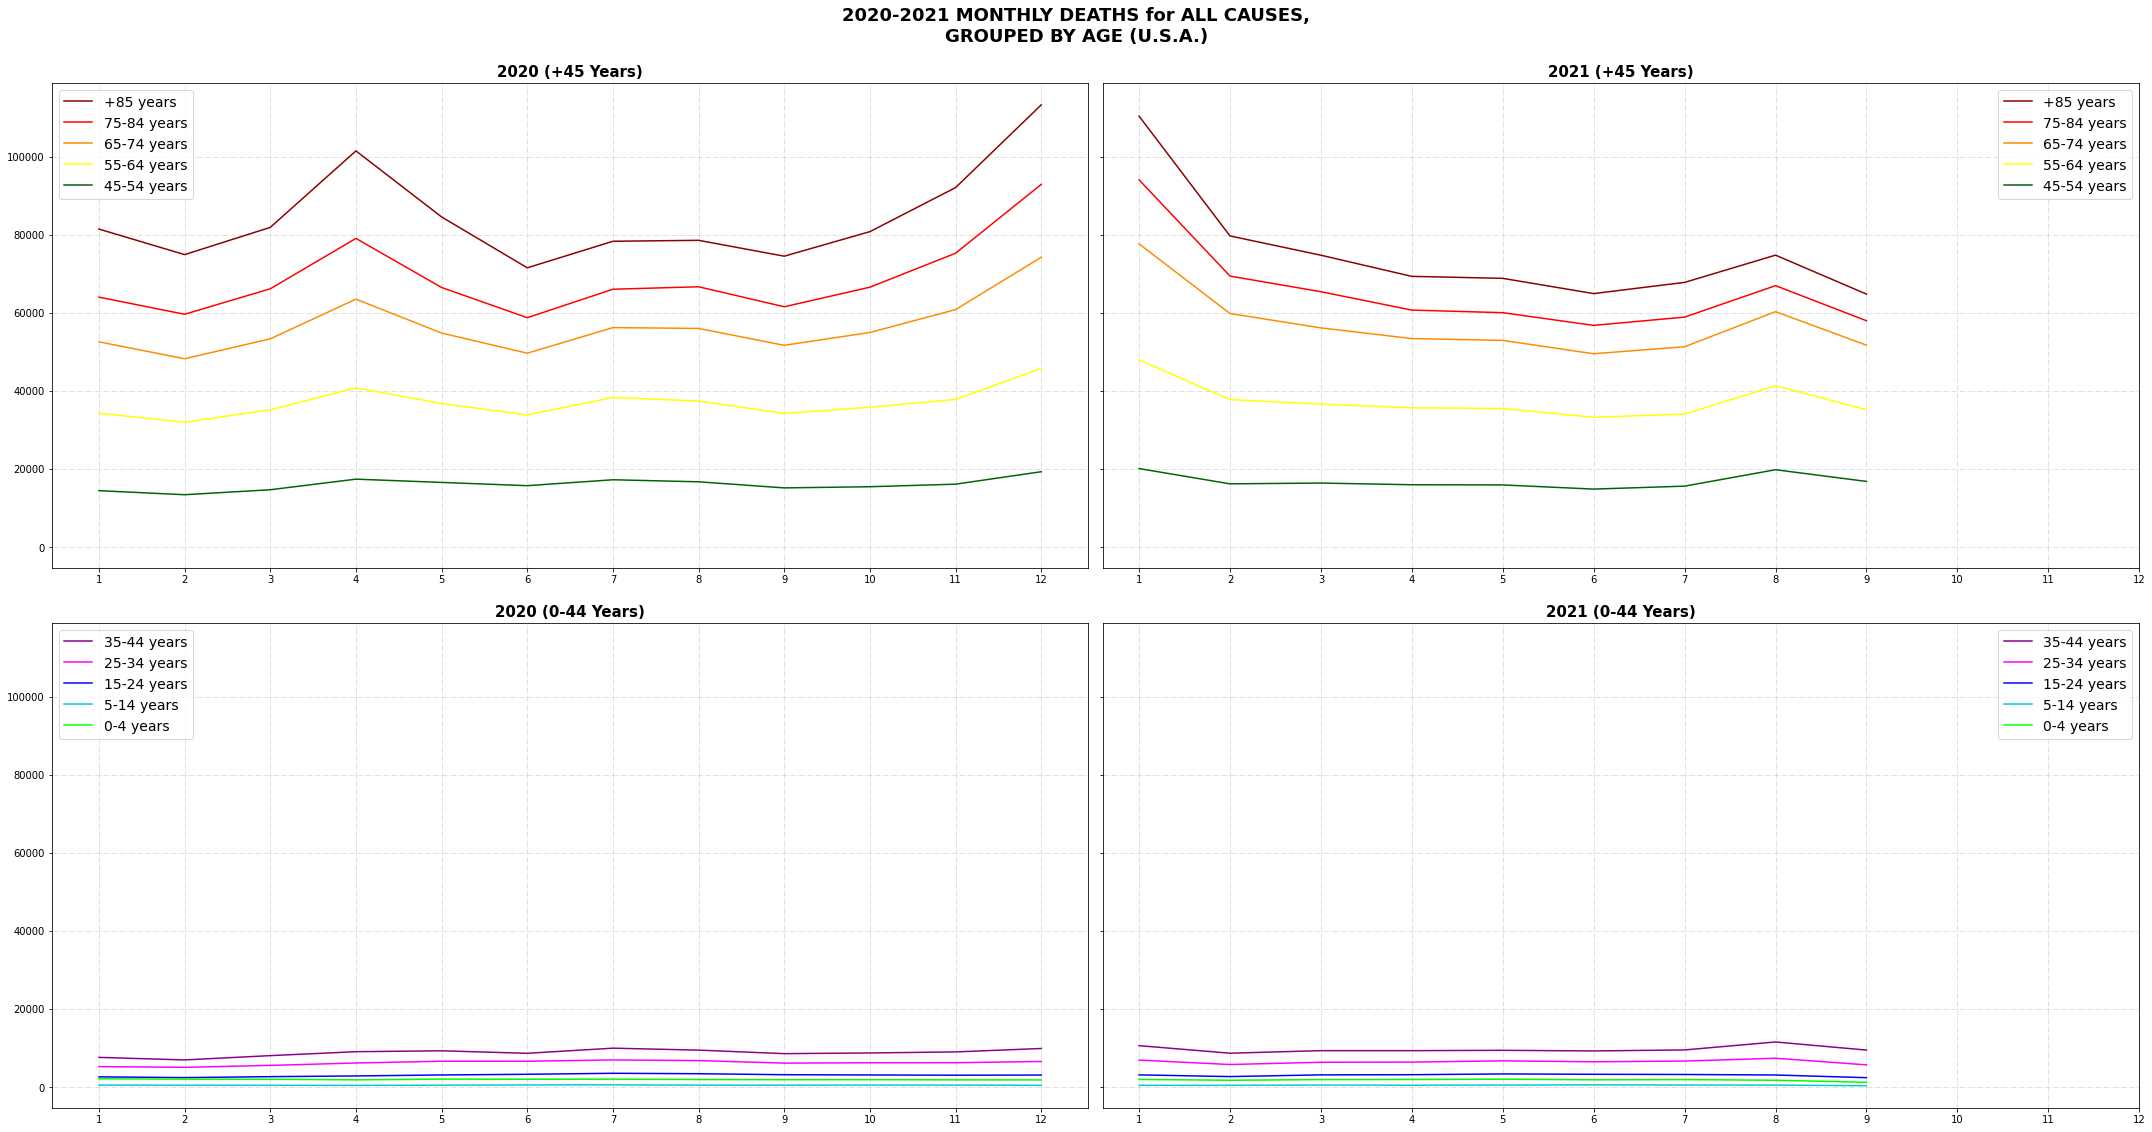

In [26]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 16), sharey=True)

# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['AllCause']
ax1.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['AllCause']
ax1.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['AllCause']
ax1.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['AllCause']
ax1.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['AllCause']
ax1.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax1.set_title('2020 (+45 Years)', fontweight='bold', fontsize=15)
ax1.legend(fontsize=14, loc='upper left')
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['AllCause']
ax2.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['AllCause']
ax2.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['AllCause']
ax2.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['AllCause']
ax2.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['AllCause']
ax2.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax2.set_title('2021 (+45 Years)', fontweight='bold', fontsize=15)
ax2.legend(fontsize=14, loc='upper right')
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['AllCause']
ax3.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['AllCause']
ax3.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['AllCause']
ax3.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['AllCause']
ax3.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['AllCause']
ax3.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax3.set_title('2020 (0-44 Years)', fontweight='bold', fontsize=15)
ax3.legend(fontsize=14, loc='upper left')
ax3.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax3.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['AllCause']
ax4.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['AllCause']
ax4.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['AllCause']
ax4.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['AllCause']
ax4.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['AllCause']
ax4.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax4.set_title('2021 (0-44 Years)', fontweight='bold', fontsize=15)
ax4.legend(fontsize=14, loc='upper right')
ax4.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax4.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------

plt.suptitle('2020-2021 MONTHLY DEATHS for ALL CAUSES,\nGROUPED BY AGE (U.S.A.)\n ', fontweight='bold', fontsize=18)
plt.tight_layout(h_pad=2);

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Interesante...<br>
Aquí vemos que ninguno de los picos afectó a la población menor a 24 años, y que a la poblacion entre 25 y 44 años solamente le afectó el pico de finales de 2020 e inicios de 2021, y el del verano de 2021. De hecho, a todos los rangos de edad superiores a 25 años les afectó más el pico de finales de 2020 e inicios de 2021 que el famoso pico de la pandemia<br>
En principio, eso concuerda con las conclusiones preliminares a las que habíamos llegado, pero discriminemos ahora por causas de fallecimiento, a ver que encontramos...

Hago un gráfico comparativo de **2020** y **2021**, con la cantidad de **muertes por COVID-19** (solo como causa múltiple, ya que como causa subjacente da el mismo resultado) en cada año, discriminando por grupo de edad:

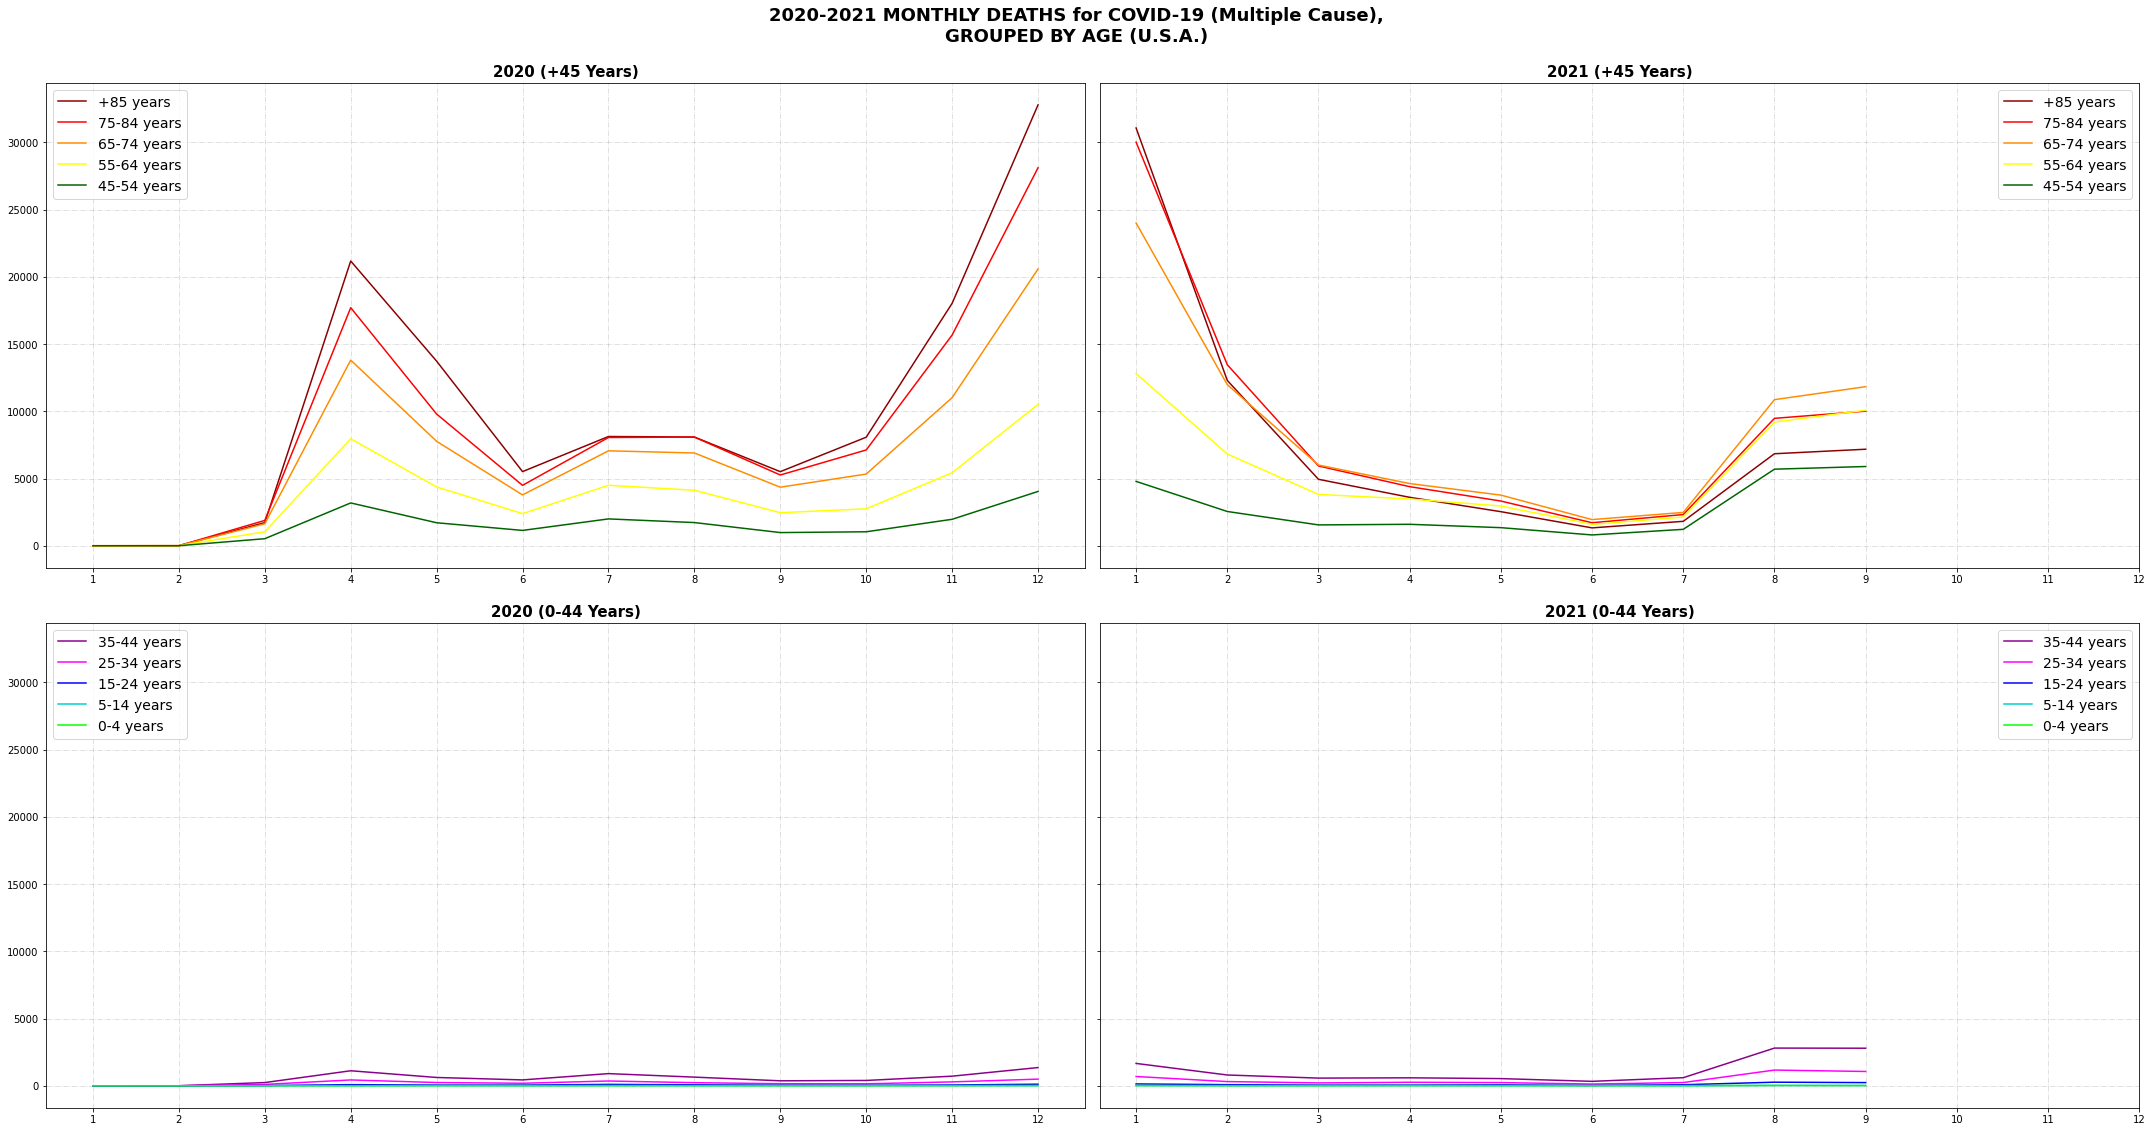

In [27]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 16), sharey=True)

# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['COVID-19_Multiple']
ax1.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['COVID-19_Multiple']
ax1.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['COVID-19_Multiple']
ax1.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['COVID-19_Multiple']
ax1.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['COVID-19_Multiple']
ax1.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax1.set_title('2020 (+45 Years)', fontweight='bold', fontsize=15)
ax1.legend(fontsize=14, loc='upper left')
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['COVID-19_Multiple']
ax2.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['COVID-19_Multiple']
ax2.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['COVID-19_Multiple']
ax2.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['COVID-19_Multiple']
ax2.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['COVID-19_Multiple']
ax2.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax2.set_title('2021 (+45 Years)', fontweight='bold', fontsize=15)
ax2.legend(fontsize=14, loc='upper right')
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['COVID-19_Multiple']
ax3.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['COVID-19_Multiple']
ax3.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['COVID-19_Multiple']
ax3.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['COVID-19_Multiple']
ax3.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['COVID-19_Multiple']
ax3.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax3.set_title('2020 (0-44 Years)', fontweight='bold', fontsize=15)
ax3.legend(fontsize=14, loc='upper left')
ax3.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax3.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['COVID-19_Multiple']
ax4.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['COVID-19_Multiple']
ax4.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['COVID-19_Multiple']
ax4.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['COVID-19_Multiple']
ax4.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['COVID-19_Multiple']
ax4.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax4.set_title('2021 (0-44 Years)', fontweight='bold', fontsize=15)
ax4.legend(fontsize=14, loc='upper right')
ax4.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax4.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------

plt.suptitle('2020-2021 MONTHLY DEATHS for COVID-19 (Multiple Cause),\nGROUPED BY AGE (U.S.A.)\n ', fontweight='bold', fontsize=18)
plt.tight_layout(h_pad=2);

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
En este gráfico volvemos a ver que lo población menor a 24 años (que, en su inmensa mayoría, no se ha vacunado), no fue afectada por la COVID-19 en absoluto, en ningún momento. Eso podríamos explicarlo diciendo que la COVID-19 no afecta a esos rangos de edad, pero ¿cómo explicamos que el pico que más afectó a la población entre 25 y 54 años fue el de verano de 2021?<br>
Veamos que nos dicen otras causas de fallecimiento...

Hago un gráfico comparativo de **2020** y **2021**, con la cantidad de **muertes por Enfermedades del Corazón** en cada año, discriminando por grupo de edad:

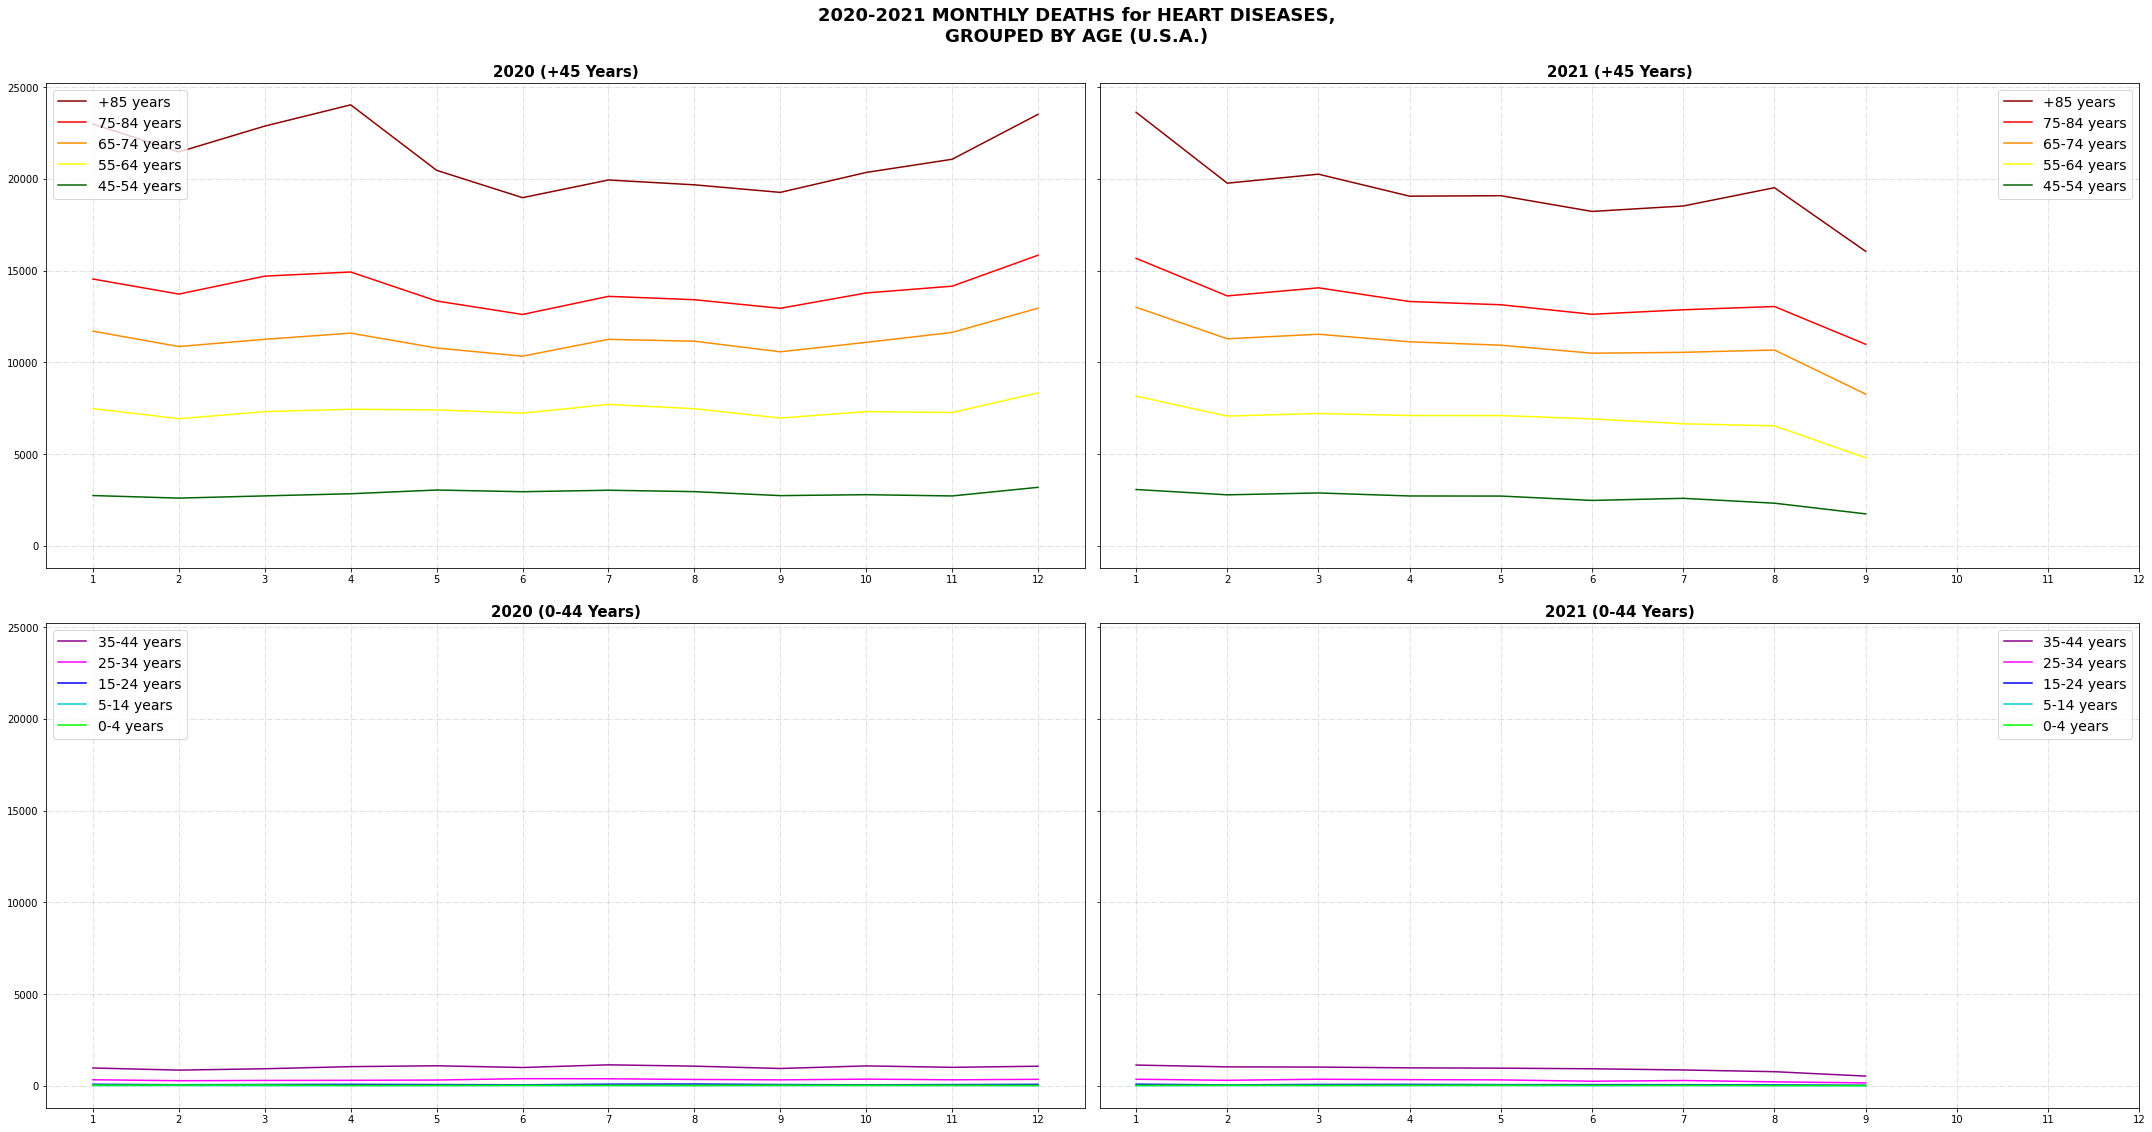

In [28]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 16), sharey=True)

# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['Heart_Diseases']
ax1.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['Heart_Diseases']
ax1.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['Heart_Diseases']
ax1.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['Heart_Diseases']
ax1.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['Heart_Diseases']
ax1.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax1.set_title('2020 (+45 Years)', fontweight='bold', fontsize=15)
ax1.legend(fontsize=14, loc='upper left')
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['Heart_Diseases']
ax2.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['Heart_Diseases']
ax2.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['Heart_Diseases']
ax2.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['Heart_Diseases']
ax2.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['Heart_Diseases']
ax2.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax2.set_title('2021 (+45 Years)', fontweight='bold', fontsize=15)
ax2.legend(fontsize=14, loc='upper right')
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['Heart_Diseases']
ax3.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['Heart_Diseases']
ax3.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['Heart_Diseases']
ax3.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['Heart_Diseases']
ax3.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['Heart_Diseases']
ax3.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax3.set_title('2020 (0-44 Years)', fontweight='bold', fontsize=15)
ax3.legend(fontsize=14, loc='upper left')
ax3.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax3.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['Heart_Diseases']
ax4.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['Heart_Diseases']
ax4.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['Heart_Diseases']
ax4.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['Heart_Diseases']
ax4.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['Heart_Diseases']
ax4.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax4.set_title('2021 (0-44 Years)', fontweight='bold', fontsize=15)
ax4.legend(fontsize=14, loc='upper right')
ax4.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax4.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------

plt.suptitle('2020-2021 MONTHLY DEATHS for HEART DISEASES,\nGROUPED BY AGE (U.S.A.)\n ', fontweight='bold', fontsize=18)
plt.tight_layout(h_pad=2);

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Si recordamos, en el dataset anterior hemos visto un pequeño pico coincidente con el inicio de la vacunación, relacionado con las enfermedades del corazón.<br>
Pues con este gráfico podemos afirmar, sin ninguna duda, que ese pico afectó exclusivamente a los grupos de edad que fueron vacunados en ese momento. ¿Por qué?

Hago un gráfico comparativo de **2020** y **2021**, con la cantidad de **muertes por Enfermedades Cerebrovasculares** en cada año, discriminando por grupo de edad:

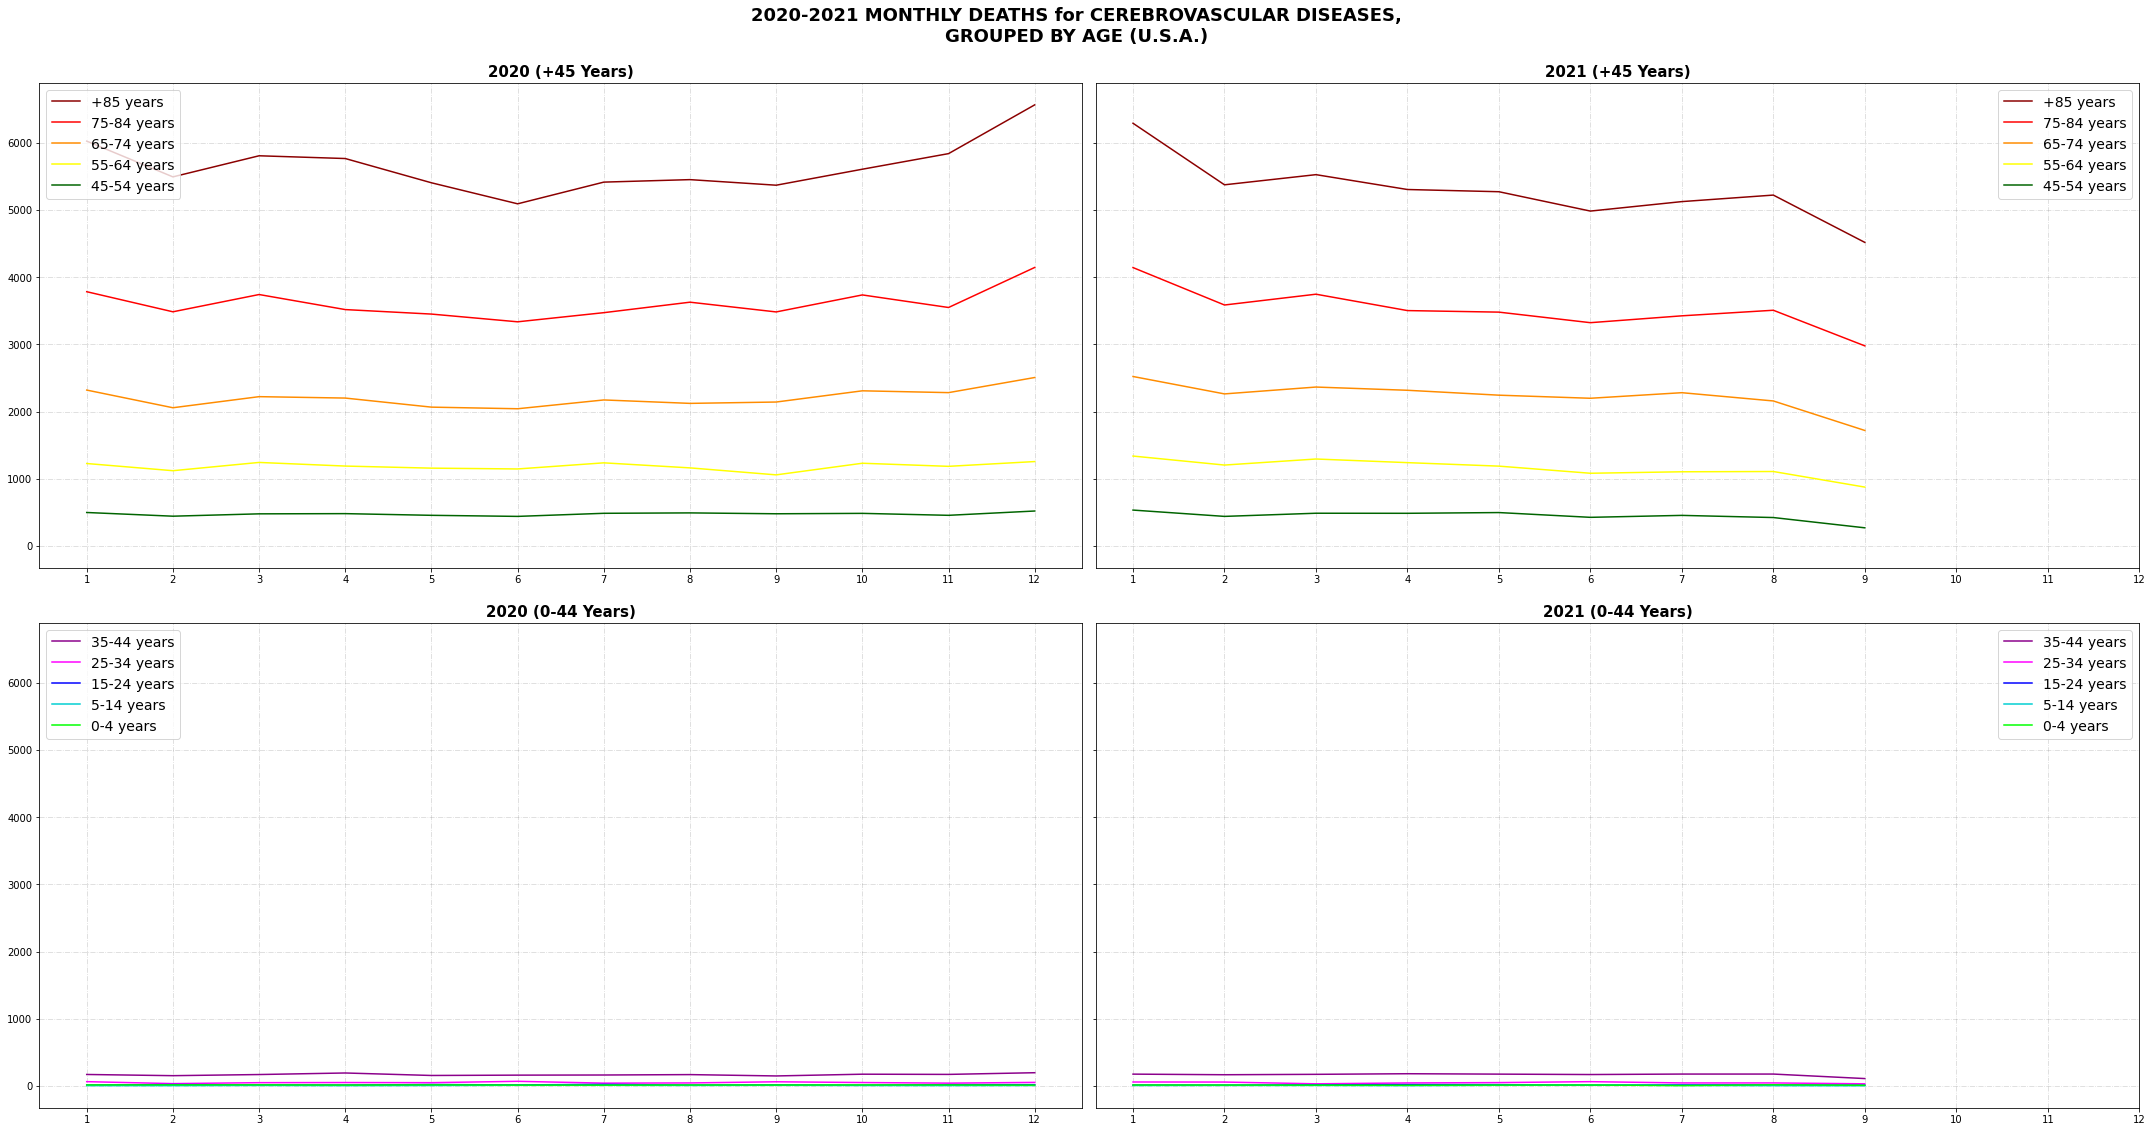

In [29]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 16), sharey=True)

# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['Cerebrovascular_Diseases']
ax1.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['Cerebrovascular_Diseases']
ax1.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['Cerebrovascular_Diseases']
ax1.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['Cerebrovascular_Diseases']
ax1.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['Cerebrovascular_Diseases']
ax1.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax1.set_title('2020 (+45 Years)', fontweight='bold', fontsize=15)
ax1.legend(fontsize=14, loc='upper left')
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['Cerebrovascular_Diseases']
ax2.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['Cerebrovascular_Diseases']
ax2.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['Cerebrovascular_Diseases']
ax2.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['Cerebrovascular_Diseases']
ax2.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['Cerebrovascular_Diseases']
ax2.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax2.set_title('2021 (+45 Years)', fontweight='bold', fontsize=15)
ax2.legend(fontsize=14, loc='upper right')
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['Cerebrovascular_Diseases']
ax3.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['Cerebrovascular_Diseases']
ax3.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['Cerebrovascular_Diseases']
ax3.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['Cerebrovascular_Diseases']
ax3.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['Cerebrovascular_Diseases']
ax3.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax3.set_title('2020 (0-44 Years)', fontweight='bold', fontsize=15)
ax3.legend(fontsize=14, loc='upper left')
ax3.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax3.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['Cerebrovascular_Diseases']
ax4.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['Cerebrovascular_Diseases']
ax4.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['Cerebrovascular_Diseases']
ax4.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['Cerebrovascular_Diseases']
ax4.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['Cerebrovascular_Diseases']
ax4.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax4.set_title('2021 (0-44 Years)', fontweight='bold', fontsize=15)
ax4.legend(fontsize=14, loc='upper right')
ax4.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax4.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------

plt.suptitle('2020-2021 MONTHLY DEATHS for CEREBROVASCULAR DISEASES,\nGROUPED BY AGE (U.S.A.)\n ', fontweight='bold', fontsize=18)
plt.tight_layout(h_pad=2);

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Aquí nos encontramos más o menos lo mismo que en el gráfico anterior, pero con algo menos de afectación en el grupo de edad entre 55 y 64 años.

Hago un gráfico comparativo de **2020** y **2021**, con la cantidad de **muertes por Diabetes Miellitus** en cada año, discriminando por grupo de edad:

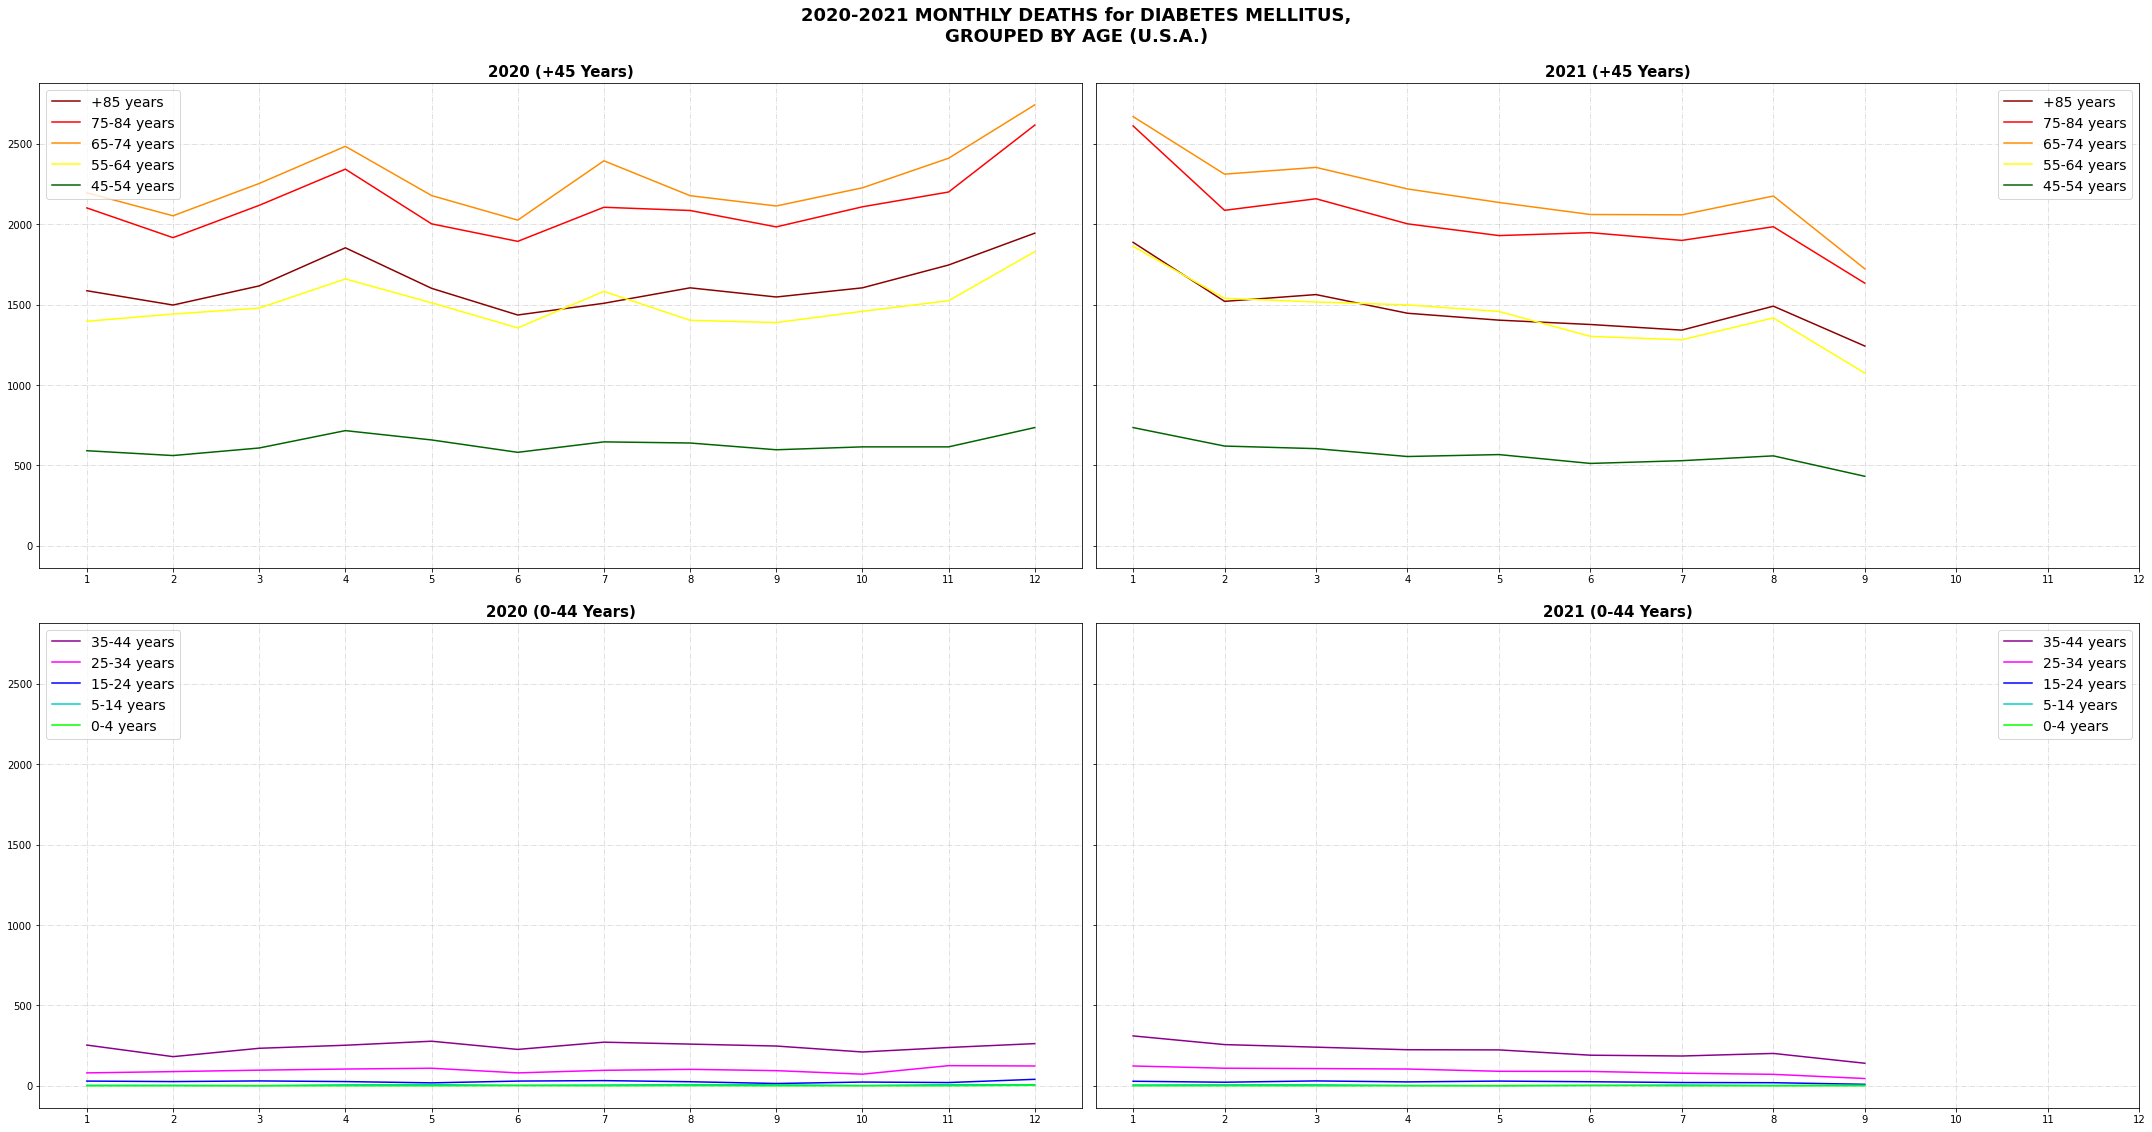

In [30]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 16), sharey=True)

# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['Diabetes_Mellitus']
ax1.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['Diabetes_Mellitus']
ax1.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['Diabetes_Mellitus']
ax1.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['Diabetes_Mellitus']
ax1.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['Diabetes_Mellitus']
ax1.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax1.set_title('2020 (+45 Years)', fontweight='bold', fontsize=15)
ax1.legend(fontsize=14, loc='upper left')
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['Diabetes_Mellitus']
ax2.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['Diabetes_Mellitus']
ax2.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['Diabetes_Mellitus']
ax2.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['Diabetes_Mellitus']
ax2.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['Diabetes_Mellitus']
ax2.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax2.set_title('2021 (+45 Years)', fontweight='bold', fontsize=15)
ax2.legend(fontsize=14, loc='upper right')
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['Diabetes_Mellitus']
ax3.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['Diabetes_Mellitus']
ax3.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['Diabetes_Mellitus']
ax3.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['Diabetes_Mellitus']
ax3.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['Diabetes_Mellitus']
ax3.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax3.set_title('2020 (0-44 Years)', fontweight='bold', fontsize=15)
ax3.legend(fontsize=14, loc='upper left')
ax3.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax3.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['Diabetes_Mellitus']
ax4.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['Diabetes_Mellitus']
ax4.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['Diabetes_Mellitus']
ax4.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['Diabetes_Mellitus']
ax4.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['Diabetes_Mellitus']
ax4.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax4.set_title('2021 (0-44 Years)', fontweight='bold', fontsize=15)
ax4.legend(fontsize=14, loc='upper right')
ax4.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax4.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------

plt.suptitle('2020-2021 MONTHLY DEATHS for DIABETES MELLITUS,\nGROUPED BY AGE (U.S.A.)\n ', fontweight='bold', fontsize=18)
plt.tight_layout(h_pad=2);

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Y tres cuartos de lo mismo nos encontramos con la Diabetes Miellitus, con la curiosidad de que parece haber contribuido lo suyo a engrosar el famoso pico de la pandemia, en todos los grupos de edad por encima de 55 años.<br>
Esto no lo hemos visto con ninguna otra causa de muerte (salvo la COVID-19, obviamente).

Hago un gráfico comparativo de **2020** y **2021**, con la cantidad de **muertes por "Síntomas, Signos y Hallazgos Clínicos Anormales, no clasificados"** en cada año, discriminando por grupo de edad:

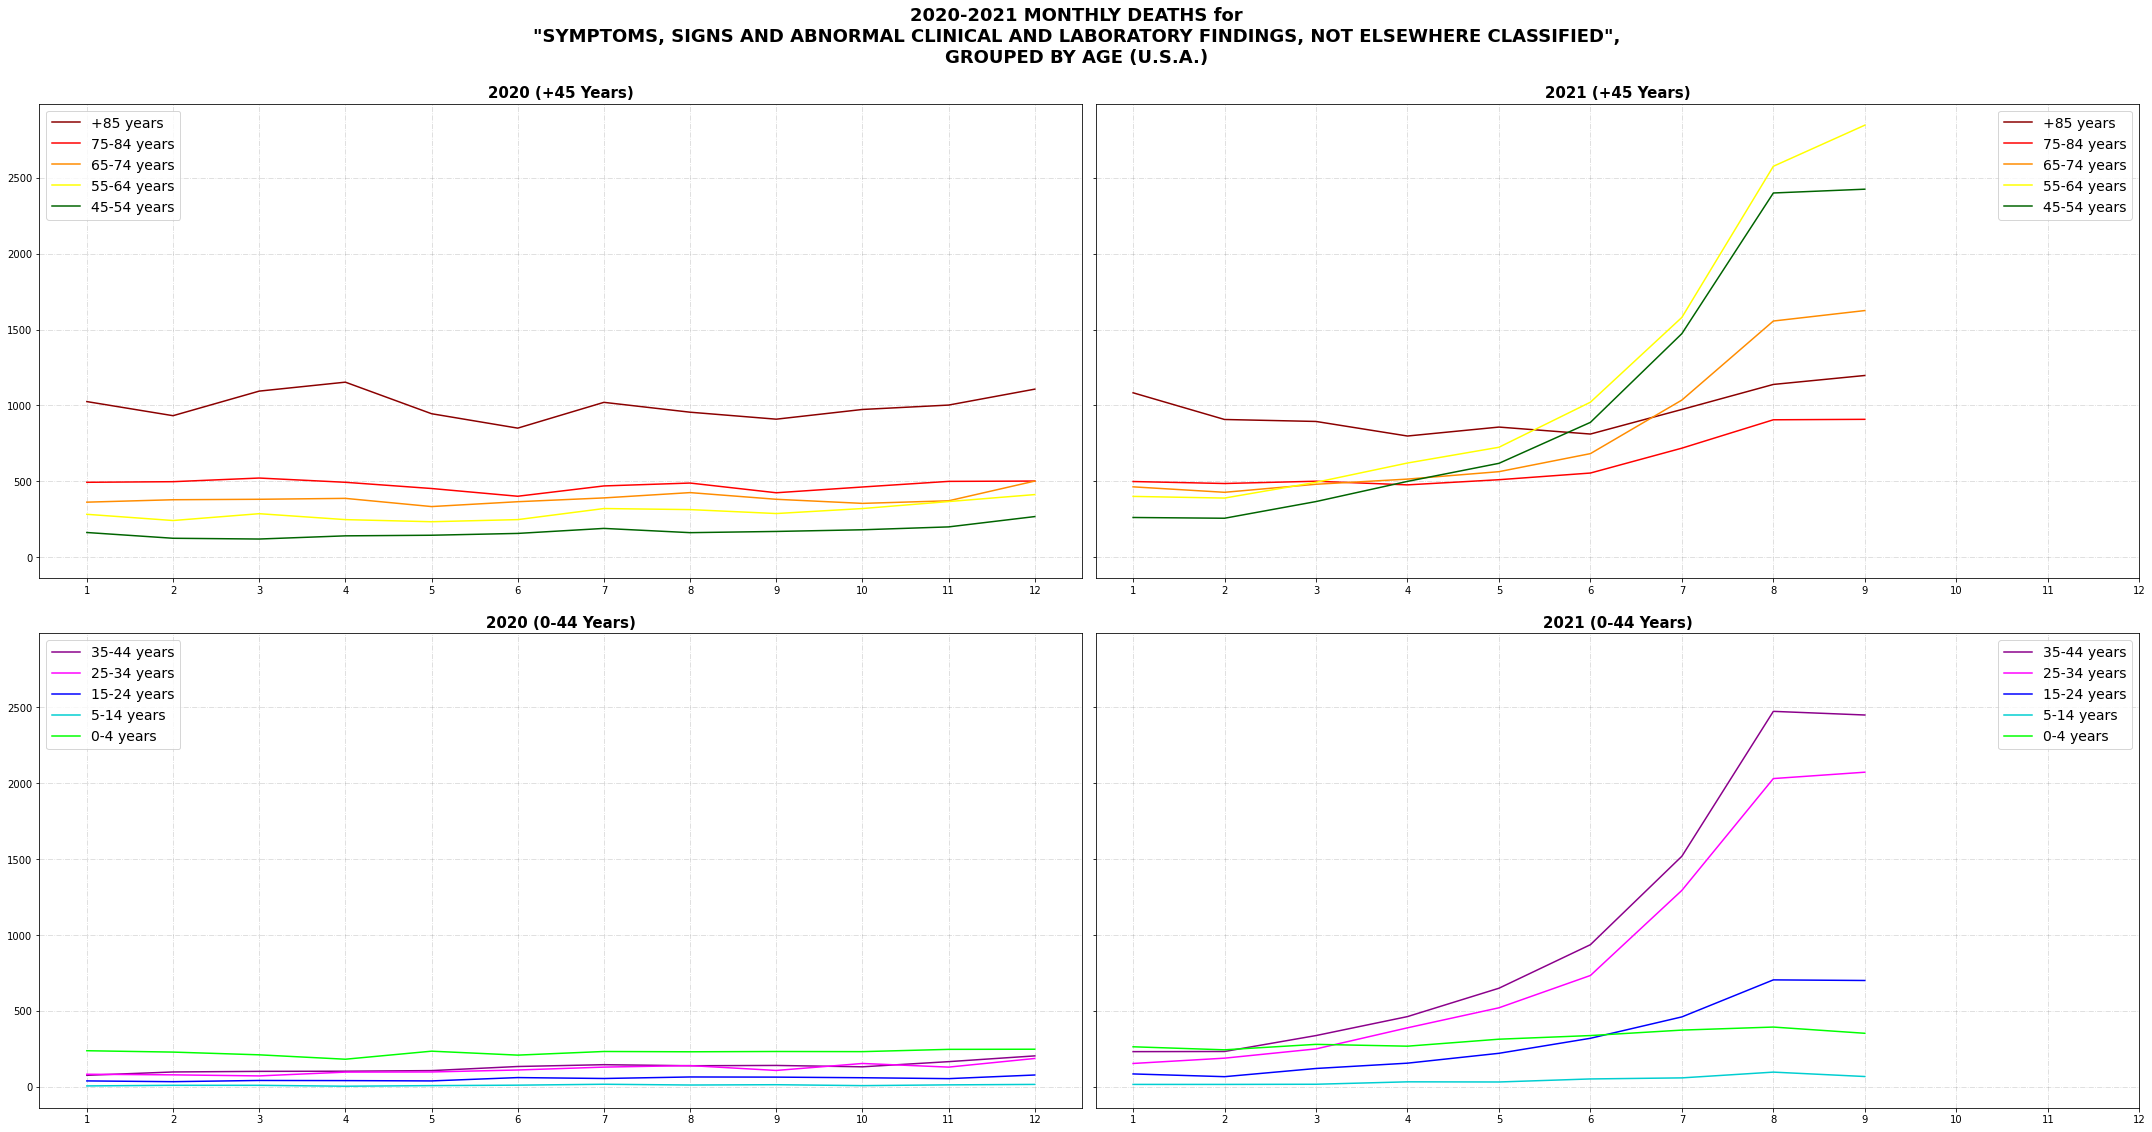

In [31]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(30, 16), sharey=True)

# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '85 years and over'")['Abnormal_Symptoms']
ax1.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '75-84 years'")['Abnormal_Symptoms']
ax1.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '65-74 years'")['Abnormal_Symptoms']
ax1.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '55-64 years'")['Abnormal_Symptoms']
ax1.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '45-54 years'")['Abnormal_Symptoms']
ax1.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax1.set_title('2020 (+45 Years)', fontweight='bold', fontsize=15)
ax1.legend(fontsize=14, loc='upper left')
ax1.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax1.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '85 years and over':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '85 years and over'")['Abnormal_Symptoms']
ax2.plot(x, y, label='+85 years', color='darkred')
# Gráfico '75-84 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '75-84 years'")['Abnormal_Symptoms']
ax2.plot(x, y, label='75-84 years', color='red')
# Gráfico '65-74 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '65-74 years'")['Abnormal_Symptoms']
ax2.plot(x, y, label='65-74 years', color='darkorange')
# Gráfico '55-64 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '55-64 years'")['Abnormal_Symptoms']
ax2.plot(x, y, label='55-64 years', color='yellow')
# Gráfico '45-54 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '45-54 years'")['Abnormal_Symptoms']
ax2.plot(x, y, label='45-54 years', color='darkgreen')
# Título, xticks, etc:
ax2.set_title('2021 (+45 Years)', fontweight='bold', fontsize=15)
ax2.legend(fontsize=14, loc='upper right')
ax2.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax2.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '35-44 years'")['Abnormal_Symptoms']
ax3.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '25-34 years'")['Abnormal_Symptoms']
ax3.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '15-24 years'")['Abnormal_Symptoms']
ax3.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '5-14 years'")['Abnormal_Symptoms']
ax3.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2020 and AgeGroup == '0-4 years'")['Abnormal_Symptoms']
ax3.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax3.set_title('2020 (0-44 Years)', fontweight='bold', fontsize=15)
ax3.legend(fontsize=14, loc='upper left')
ax3.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax3.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------
# Gráfico '35-44 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '35-44 years'")['Abnormal_Symptoms']
ax4.plot(x, y, label='35-44 years', color='darkmagenta')
# Gráfico '25-34 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '25-34 years'")['Abnormal_Symptoms']
ax4.plot(x, y, label='25-34 years', color='magenta')
# Gráfico '15-24 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '15-24 years'")['Abnormal_Symptoms']
ax4.plot(x, y, label='15-24 years', color='blue')
# Gráfico '5-14 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '5-14 years'")['Abnormal_Symptoms']
ax4.plot(x, y, label='5-14 years', color='darkturquoise')
# Gráfico '0-4 years':
x = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['Month']
y = cdc_grouped.query("Year == 2021 and AgeGroup == '0-4 years'")['Abnormal_Symptoms']
ax4.plot(x, y, label='0-4 years', color='lime')
# Título, xticks, etc:
ax4.set_title('2021 (0-44 Years)', fontweight='bold', fontsize=15)
ax4.legend(fontsize=14, loc='upper right')
ax4.grid(axis='both', color='gray', linestyle='dashdot', alpha=0.3)
ax4.set_xticks(numpy.arange(1, 13))
# ----------------------------------------------------------------------------------------

plt.suptitle('2020-2021 MONTHLY DEATHS for\n"SYMPTOMS, SIGNS AND ABNORMAL CLINICAL AND LABORATORY FINDINGS, NOT ELSEWHERE CLASSIFIED",\nGROUPED BY AGE (U.S.A.)\n ', fontweight='bold', fontsize=18)
plt.tight_layout(h_pad=2);

<blockquote><p style="font-family:Verdana; font-size:15px; color:darkblue"><b><i>
Y llegamos a la macabra guinda del pastel...<br>
De momento, nos extraña la distribución de las muertes por esta causa, que no cuadra con la distribución de las de ninguna otra. La curva va subiendo a lo largo del año 2021, y a partir (justamente) de finales de 2020, en casi todos los grupos de edad. Está claro que su incidencia es más progresiva que la de las otras causas de fallecimiento, y que no está relacionada con las muertes por covid.<br>
La curva del grupo mayor a 85 años nos descoloca un poco, pero aun así, hace un pico coincidente con el inicio de la vacunación, y otro a mediados de 2021.<br>
Pero lo que, desde luego, no podemos pasar por alto es que los dos grupos no vacunados varían sus valores mínimamente, a diferencia de todos los demás (de hecho, el grupo entre 0 y 4 años estaba en cabeza en enero de 2021, entre los grupos inferiores a 45 años, pero todos esos grupos lo superaron a lo largo de 2021, salvo el grupo entre 5 y 14 años, que tampoco fue vacunado).<br>
En fin, si hasta ahora podíamos tener ciertas dudas, creo que este descubrimiento nos obliga a plantearnos muy seriamente que aquí parece estar pasando algo...

---